# Lab 11: Image Classification using a Convolutional Neural Network (CNN)

<a name="toc_40291_2"></a>
# Objective



In this Lab we are going to classify a new set of images in 10 classes (multi-class classification) using a Convolutional Neural Network (CCN).
The CIFAR-10 dataset consists of 60,000 colour images in 10 classes. Each class has 6,000 images. There are 10 different classes of objects. All the images have a size of 32x32 pixels. You can see examples of the images in this dataset in fig 1.



<div>
<img src="https://drive.google.com/uc?export=view&id=1UF0myb6ed9Mzgf2-rGUbfHUFrUDYQ5dh" width="600"/>
</div>


To classify these objects, we are going to do the following steps:

•	Create a Convolutional Neural Network (CNN) and train it to be able to classify these images.

•	Test your model performance using validation metrics



# Environment set up

For this lab we are going to use the same environment as per previous session. Python as our programming language and Keras from Tensorflow as our machine learning platform. You can use Keras documentation from https://keras.io/  for extra help. Through this session you can use the previous notebook of FCN and modify it based on the requirement of this lab.

# Importing libraries and data pre-processing

To start, using your knolwdge from lab 10, load your dataset into trani and test sets and create your validation set by spliiting your train data.  


*   Print the shape of the first image in the training set.

We are going to use the same data pre-processing method we used on the previous session (Lab 10) introducing a few changes. If you check the shape of your y_train and y_test you will notice that they are 2-dimensional arrays. We need to flatten these arrays to 1 dimension before using them. Implement the following steps: 



*   Load the **Cifar10** dataset 
*   To standardize the data, rescale **x_train**, **x_val** and **x_test** from range **0-255** to range **0-1**.
*  	Define a new variable for the number of the classes (in this case we have 10 classes). 
*  	One-hot encode **y_train**, **y_val** and **y_test** using **to_categorical** function (import it from keras.utils)







In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.datasets import cifar10 
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd

(X_train, Y_train) , (x_test, y_test)=  cifar10.load_data()#_________TODO_________

X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

#normalize your data
X_train, x_test=  X_train/255.0, x_test/255.0   #_________TODO_________

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1) 

num_classes= 10 #_________TODO_________

print(x_train.shape,y_train.shape, x_val.shape,y_val.shape)

#one-hot encode the labels
y_train_1hot =  keras.utils.to_categorical(y_train, num_classes) #_________TODO_________

y_test_1hot = keras.utils.to_categorical(y_test, num_classes)#_________TODO__________

y_val_1hot = keras.utils.to_categorical(y_val, num_classes)#_________TODO___________


#Print the shape of the first image in the training set.
#_________TODO___________
print(f"This is the shape of the first image in the training dataset: {x_train[0].shape}")


170498071/170498071 [==============================] - 6s 0us/step
(45000, 32, 32, 3) (45000, 1) (5000, 32, 32, 3) (5000, 1)
This is the shape of the first image in the training dataset: (32, 32, 3)


# Building the model





Implement the following steps:


*   Build a keras Sequential model
*	Add a **conv2D** layer with **32** output features, **3*3 kernel** , **relu** activation 
function and **input_shape=shape of your images** (width, hight, color channels).
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **conv2D** layer with **64** output features, **3*3 kernel** and **relu **activation function.
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **conv2D** layer with **128** output features, **3*3 kernel** and **relu** activation function.
*	Add a **MaxPooling2D** layer with **2*2 kernel**.
*	Add a **Flatten** layer.
*	Add a **Dense** layer with **512** output features and relu activation function.
*	Add your final Dense layer with number of **output features= number of classes** and Softmax activation function.

After you built your model, you need to compile the model. Implement the following steps in your notebook in a new code cell:
* Compile your model with **model.compile()** using **SGD** as your optimizer. **categorical_crossentropy** as your loss function and Accuracy as your metric.
* Train your model with **model.fit()** with **15** epochs and store the results in a 



In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32, 32, 3)), #_______TODO_______
    keras.layers.MaxPooling2D((2,2)), #_______TODO_______

    keras.layers.Conv2D(64, (3, 3), activation='relu'), #_______TODO_______
    keras.layers.MaxPooling2D((2, 2)), #_______TODO_______

    keras.layers.Conv2D(128, (3, 3), activation='relu'), #_______TODO_______
    keras.layers.MaxPooling2D((2, 2)), #_______TODO_______

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),   #_______TODO_______
    keras.layers.Dense(10, activation='softmax')   #_______TODO_______
])

#compile model
optimizer = keras.optimizers.SGD()
model.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#print(model.summary())

# Training the model

In [ ]:
#train the model
r = model.fit(x_train , y_train_1hot ,batch_size=64, validation_data=(x_val, y_val_1hot),epochs=15)  

Epoch 1/15
704/704 [==============================] - 4s 5ms/step - loss: 2.2422 - accuracy: 0.1903 - val_loss: 2.1158 - val_accuracy: 0.2068
Epoch 2/15
704/704 [==============================] - 3s 5ms/step - loss: 2.0104 - accuracy: 0.2633 - val_loss: 1.9854 - val_accuracy: 0.2550
Epoch 3/15
704/704 [==============================] - 3s 5ms/step - loss: 1.8572 - accuracy: 0.3300 - val_loss: 2.0053 - val_accuracy: 0.2696
Epoch 4/15
704/704 [==============================] - 4s 5ms/step - loss: 1.7074 - accuracy: 0.3854 - val_loss: 1.7831 - val_accuracy: 0.3326
Epoch 5/15
704/704 [==============================] - 4s 6ms/step - loss: 1.5866 - accuracy: 0.4252 - val_loss: 1.6251 - val_accuracy: 0.3998
Epoch 6/15
704/704 [==============================] - 3s 5ms/step - loss: 1.5118 - accuracy: 0.4567 - val_loss: 1.7059 - val_accuracy: 0.3928
Epoch 7/15
704/704 [==============================] - 3s 5ms/step - loss: 1.4509 - accuracy: 0.4798 - val_loss: 1.6006 - val_accuracy: 0.4262
Epoch 

# Evaluate the model

Implement the following steps:
* Plot training and validation loss of your model (1 plot)
*	Plot training and validation accuracy of your model (1 plot)
*	Print loss and accuracy of your model using **model.evaluate()**
*	Plot your confusion matrix 

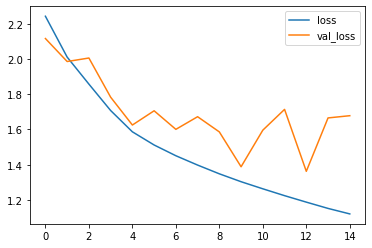

In [ ]:
#plot loss
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

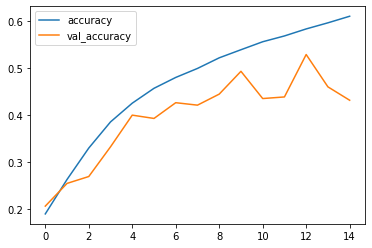

In [ ]:
#accuracy
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()


In [ ]:
#evaluate
print(model.evaluate(x_test,y_test_1hot))

313/313 [==============================] - 1s 3ms/step - loss: 1.6646 - accuracy: 0.4335
[1.6645689010620117, 0.4334999918937683]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[575   6  48   2   4   1   4   0 357   3]
 [130 447  14   2   0   3   4   0 375  25]
 [112   7 664  25   8  29  23   1 129   2]
 [ 70   6 306 268  17 113  26   1 184   9]
 [ 80   4 485  15 216  26  31   7 134   2]
 [ 43   6 308 109  16 370  13   7 123   5]
 [ 60  15 264  51  27  28 432   1 116   6]
 [128  12 273  40  79 103   6 231 105  23]
 [ 49   9   9   3   0   1   1   0 928   0]
 [ 69 119  39   4   3   6   8   1 547 204]]


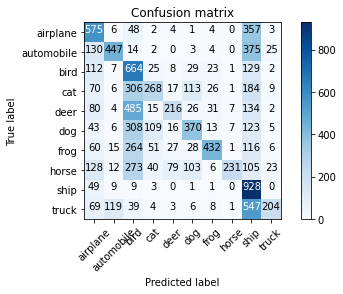

In [ ]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


#plot the CM 
p_test= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm,classes=labels) 

## Questions: Part 1
Once you finish coding answer these questions here in red font:

* How is the performance of your model based on the validation set and plots?

* Where is the highest inaccuracy of your model in the confusion matrix? Which labels your model confuses the most? Why do you think it happens? 
* Report loss and accuracy of your model using model.evaluate() on the test set (write the numbers here because we are going to modify the code in the next sections).
* Report on how it compares to the performance of the model using your training and validation sets.




<font color='red'>

1. Based on the set and plots from the validation dataset, the model has the tendency of overfitting because the validaiton loss is gradually increasing ( although inconsistently) while the training loss is still decreasing.
2. The highest inaccuracy of the model is 547, and the label the model confuses most is **ship classified as truck**.
3. The loss and accuracy of the test are:  loss: 1.6646 - accuracy: 0.4335<br/>
4. Training loss: 1.1209 - Training accuracy: 0.6096, 
   val_loss: 1.6780 - val_accuracy: 0.4314
   In comparison with the training loss, the loss of the test dataset is higher. And its accuracy is also lower than the training accuracy. <br/>
  Comparing the test and validation dataset, the loss and accuracy are approximately the same
 </font>

# Model improvement

Now we want to improve the performance of the classifer by tunning hyperparameters and modifying the model architecture. We will use multiple approaches for this purpose:


**1. Adding more Convolutional layers**:

*  	After each **Conv2D** layer add another **Conv2D** layer with the same parameters as the layer above so that you have 3 pairs of identical layers in sequence


**2. Padding:**

the convolutional layers reduce the size of the output. So in cases where we want to increase the size of the output and save the information presented in the corners we can use padding layers where padding helps by adding extra rows and columns on the outer dimension of the images. So the size of input data will remain similar to the output data.

There are three types of padding: Same padding, Causal padding, and Valid padding

* Add **padding=’same’** to each of your Conv2D layer

**3. Batch Normalization layer**

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. Batch normalization prevents our NN from exploding gradient issue, and additionally to reduce overfitting.
* add a **BatchNormalization** layer after each Conv2D layer and the first Dense layer

**4. Dropout layer:**

By adding a dropout layer, you will drop out the nodes (input and hidden layer) in your neural network. All the forward and backwards connections with a dropped node are temporarily removed, thus creating a new network architecture out of the parent network. The nodes are dropped by a dropout probability of **p**. The dropout allows our NN to become weight-independent during the training process by randomly dropping weights in a chosen layer.
* After each **Maxpooling** add a **Dropout layer** with the values of **p=0.2**, **p=0.3** and **p=0.4** respectively.
* After your **Flatten layer**, add a **Dropout layer** with **p=0.2** chance. 
*   Add another dropout layer with **p=0.2** after your first **Dense layer**.

**5. Learning rate:**

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

* Change your optimizer to **Adam** with **learning rate= 0.001**. 
* set your **batch_size** to **128**.

* Now train your model again. 







In [ ]:
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32, 32, 3), padding='same'), 
    BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPooling2D((2, 2)), 
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), 
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)), 
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2), #dropout after the first dense layer
    keras.layers.BatchNormalization(),   
    keras.layers.Dense(10, activation='softmax')   
])

#compile model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#print(model.summary())

In [ ]:
#train the model
r2 = model2.fit(x_train , y_train_1hot ,batch_size=128, validation_data=(x_val, y_val_1hot),epochs=15)  

Epoch 1/15
352/352 [==============================] - 8s 18ms/step - loss: 1.5571 - accuracy: 0.4626 - val_loss: 2.7896 - val_accuracy: 0.1746
Epoch 2/15
352/352 [==============================] - 6s 16ms/step - loss: 1.0268 - accuracy: 0.6352 - val_loss: 0.8755 - val_accuracy: 0.6874
Epoch 3/15
352/352 [==============================] - 6s 17ms/step - loss: 0.8483 - accuracy: 0.6988 - val_loss: 0.8010 - val_accuracy: 0.7200
Epoch 4/15
352/352 [==============================] - 6s 17ms/step - loss: 0.7501 - accuracy: 0.7342 - val_loss: 0.7554 - val_accuracy: 0.7308
Epoch 5/15
352/352 [==============================] - 6s 16ms/step - loss: 0.6788 - accuracy: 0.7618 - val_loss: 0.6798 - val_accuracy: 0.7562
Epoch 6/15
352/352 [==============================] - 6s 18ms/step - loss: 0.6208 - accuracy: 0.7812 - val_loss: 0.6054 - val_accuracy: 0.7868
Epoch 7/15
352/352 [==============================] - 6s 17ms/step - loss: 0.5758 - accuracy: 0.7971 - val_loss: 0.6065 - val_accuracy: 0.7876

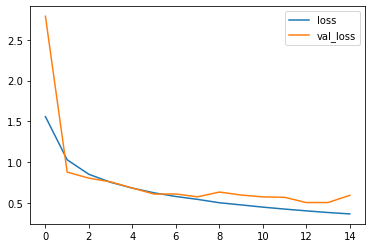

In [ ]:
#plot loss
plt.plot(r2.history['loss'],label='loss')
plt.plot(r2.history['val_loss'],label='val_loss')
plt.legend()

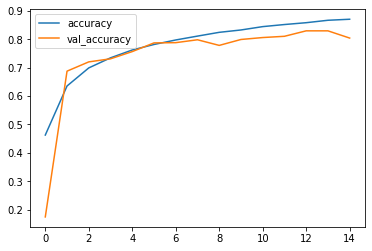

In [ ]:
#accuracy
plt.plot(r2.history['accuracy'],label='accuracy')
plt.plot(r2.history['val_accuracy'],label='val_accuracy')
plt.legend()


In [ ]:
#evaluate
print(model2.evaluate(x_test,y_test_1hot))

313/313 [==============================] - 1s 4ms/step - loss: 0.5995 - accuracy: 0.8029
[0.599497377872467, 0.8029000163078308]


313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[699  11  17  36  45  18  18   5  81  70]
 [  5 839   0   3   3   2   7   0  19 122]
 [ 37   2 587  45  98 123  79  12   8   9]
 [  5   4  19 640  54 194  55  10   6  13]
 [  2   1  17  33 875  32  13  21   2   4]
 [  3   0   9  91  37 832  11  10   2   5]
 [  1   0   4  47  32  20 890   1   3   2]
 [  2   3   7  33  53  80  10 795   3  14]
 [ 14   9   5   8   9   5   5   2 910  33]
 [  5   6   1   5   2   3   3   4   9 962]]


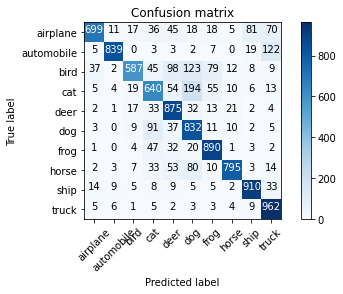

In [ ]:
#plot the CM 
p_test= model2.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm,classes=labels) 

## Questions: Part 2

* Report loss and accuracy of your model using model.evaluate() on the test set.
* Report on how it compares to the performance of the model using your training and validation sets.



<font color="red">
1.  Test dataset :- loss: 0.5995 - accuracy: 0.8029 <br />
2.  After 15 Epochs, Training loss: 0.3618 - Training accuracy: 0.8700 <br />
 val_loss: 0.5901 - val_accuracy: 0.8038 <br />
 Comparing the loss of the test dataset with the loss of the training dataset, the loss of the test dataset is significantly more than the loss of the training dataset while the accuracy of the training dataset is more than the accuracy of the test dataset.
 In the case of comparing the performance of the validation dataset and test dataset, we observed that the loss and accuracy are approximately the same respectively.
</font>

## Missclassified Data
We are going to print out some of the missclassified data and check them visually

Text(0.5, 1.0, 'True label: dog , Predicted : horse')

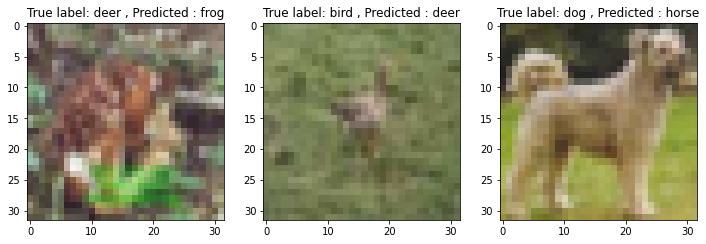

In [ ]:
"""check some missclassified images"""
misclassified_idx = [i for i, (x, y) in enumerate(zip(y_test, p_test)) if x != y]
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
plt.subplot(1, 3, 2)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))
plt.subplot(1, 3, 3)
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s , Predicted : %s"%(labels[int(y_test[i])], labels[int(p_test[i])]))



## Questions: Part 3
*	Print some of the misclassified images. Why do you think they were misclassified? 
*	Suggest 2 methods (other than what we saw on this notebook) that you can use to improve the performance of the classifier

<font color = "red">
1. Because the image are blury.
2. --We may increase the model's performance by supplementing the data we already have. It aids the model's ability to generalize across different types of images. We can apply different filters or slightly alter existing photos, such as adding a random zoom in, zoom out, rotating the image by a random angle, blurring the image, and so on.
-- We can also change the image sizes.

</font>

# Deliverable
You should deliver your Colab notebook in `.ipynb` format containing your code implementations in **EXECUTED** code cells (thus, showing the output of the cell), and include the answers to the questions of this notebook in the dedicated code cells (using red text). 
